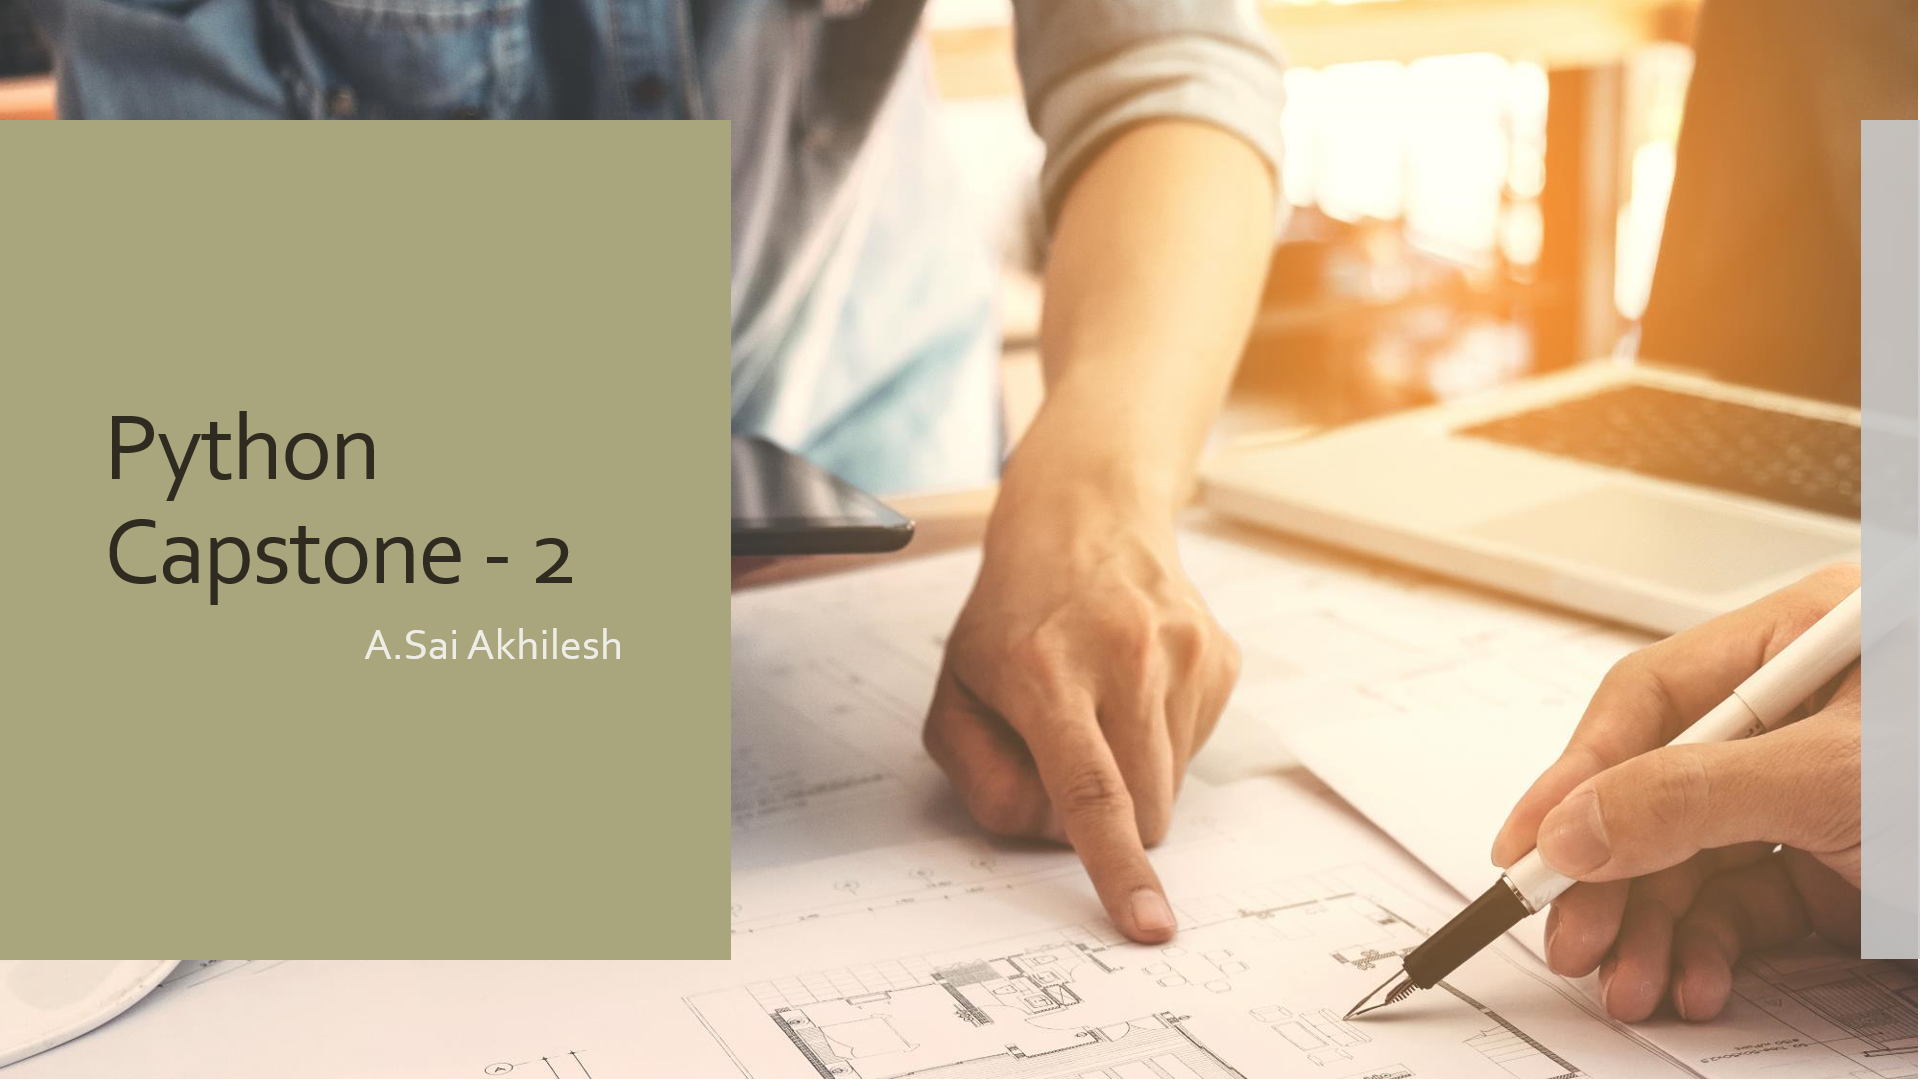

In [146]:
from PIL import Image
Image = Image.open(r"/content/Screenshot (30).png")
Image.show()

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
#Load the data 
pf = pd.read_csv(r"train.csv")
pf.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [80]:
pf = pf.drop(pf.columns[[0,2,3,4,6,7,9,10,13,14,15,16]], axis=1)

In [81]:
pf.head()

,Price,Prod. year,Fuel type,Cylinders,Gear box type,Airbags
0,13328,2010,Hybrid,6.0,Automatic,12
1,16621,2011,Petrol,6.0,Tiptronic,8
2,8467,2006,Petrol,4.0,Variator,2
3,3607,2011,Hybrid,4.0,Automatic,0
4,11726,2014,Petrol,4.0,Automatic,4


In [82]:
pf.shape

(19237, 6)

In [83]:
pf.info()
pf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          19237 non-null  int64  
 1   Prod. year     19237 non-null  int64  
 2   Fuel type      19237 non-null  object 
 3   Cylinders      19237 non-null  float64
 4   Gear box type  19237 non-null  object 
 5   Airbags        19237 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 901.9+ KB


,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,2010.912824,4.582991,6.582627
std,1.905813e+05,5.668673,1.199933,4.320168
min,1.000000e+00,1939.000000,1.000000,0.000000
25%,5.331000e+03,2009.000000,4.000000,4.000000
50%,1.317200e+04,2012.000000,4.000000,6.000000
75%,2.207500e+04,2015.000000,4.000000,12.000000
max,2.630750e+07,2020.000000,16.000000,16.000000


In [84]:
pf['Fuel type'].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

In [85]:
pf['Gear box type'].unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

In [86]:
pe = pd.get_dummies(pf,drop_first=True,dtype=int)
pe.head()

,Price,Prod. year,Cylinders,Airbags,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator
0,13328,2010,6.0,12,0,1,0,0,0,0,0,0,0
1,16621,2011,6.0,8,0,0,0,0,1,0,0,1,0
2,8467,2006,4.0,2,0,0,0,0,1,0,0,0,1
3,3607,2011,4.0,0,0,1,0,0,0,0,0,0,0
4,11726,2014,4.0,4,0,0,0,0,1,0,0,0,0


In [87]:
pe.corr()

,Price,Prod. year,Cylinders,Airbags,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator
Price,1.000000,0.012982,0.007518,-0.012824,0.032648,-0.019330,0.000069,-0.006070,-0.006536,0.001809,0.012172,0.018158,-0.003998
Prod. year,0.012982,1.000000,-0.096797,0.236969,0.004096,0.107022,0.001383,0.042946,-0.009959,0.025774,-0.519090,-0.032157,-0.030445
Cylinders,0.007518,-0.096797,1.000000,0.176868,-0.018934,-0.123915,0.008515,-0.042240,0.118942,-0.027364,-0.085027,0.178299,-0.092429
Airbags,-0.012824,0.236969,0.176868,1.000000,-0.138440,0.132772,0.002366,-0.099436,0.067279,0.040745,-0.211998,0.221598,-0.007083
Fuel type_Diesel,0.032648,0.004096,-0.018934,-0.138440,1.000000,-0.246308,-0.003715,-0.113622,-0.544581,-0.034530,0.137150,-0.123174,-0.103497
Fuel type_Hybrid,-0.019330,0.107022,-0.123915,0.132772,-0.246308,1.000000,-0.003447,-0.105405,-0.505197,-0.032033,-0.154384,-0.121681,0.207761
Fuel type_Hydrogen,0.000069,0.001383,0.008515,0.002366,-0.003715,-0.003447,1.000000,-0.001590,-0.007620,-0.000483,-0.002369,0.016444,-0.001448
Fuel type_LPG,-0.006070,0.042946,-0.042240,-0.099436,-0.113622,-0.105405,-0.001590,1.000000,-0.233049,-0.014777,-0.053294,-0.024089,-0.022524
Fuel type_Petrol,-0.006536,-0.009959,0.118942,0.067279,-0.544581,-0.505197,-0.007620,-0.233049,1.000000,-0.070823,-0.023629,0.197993,-0.067744
Fuel type_Plug-in Hybrid,0.001809,0.025774,-0.027364,0.040745,-0.034530,-0.032033,-0.000483,-0.014777,-0.070823,1.000000,-0.022022,-0.003957,0.047079


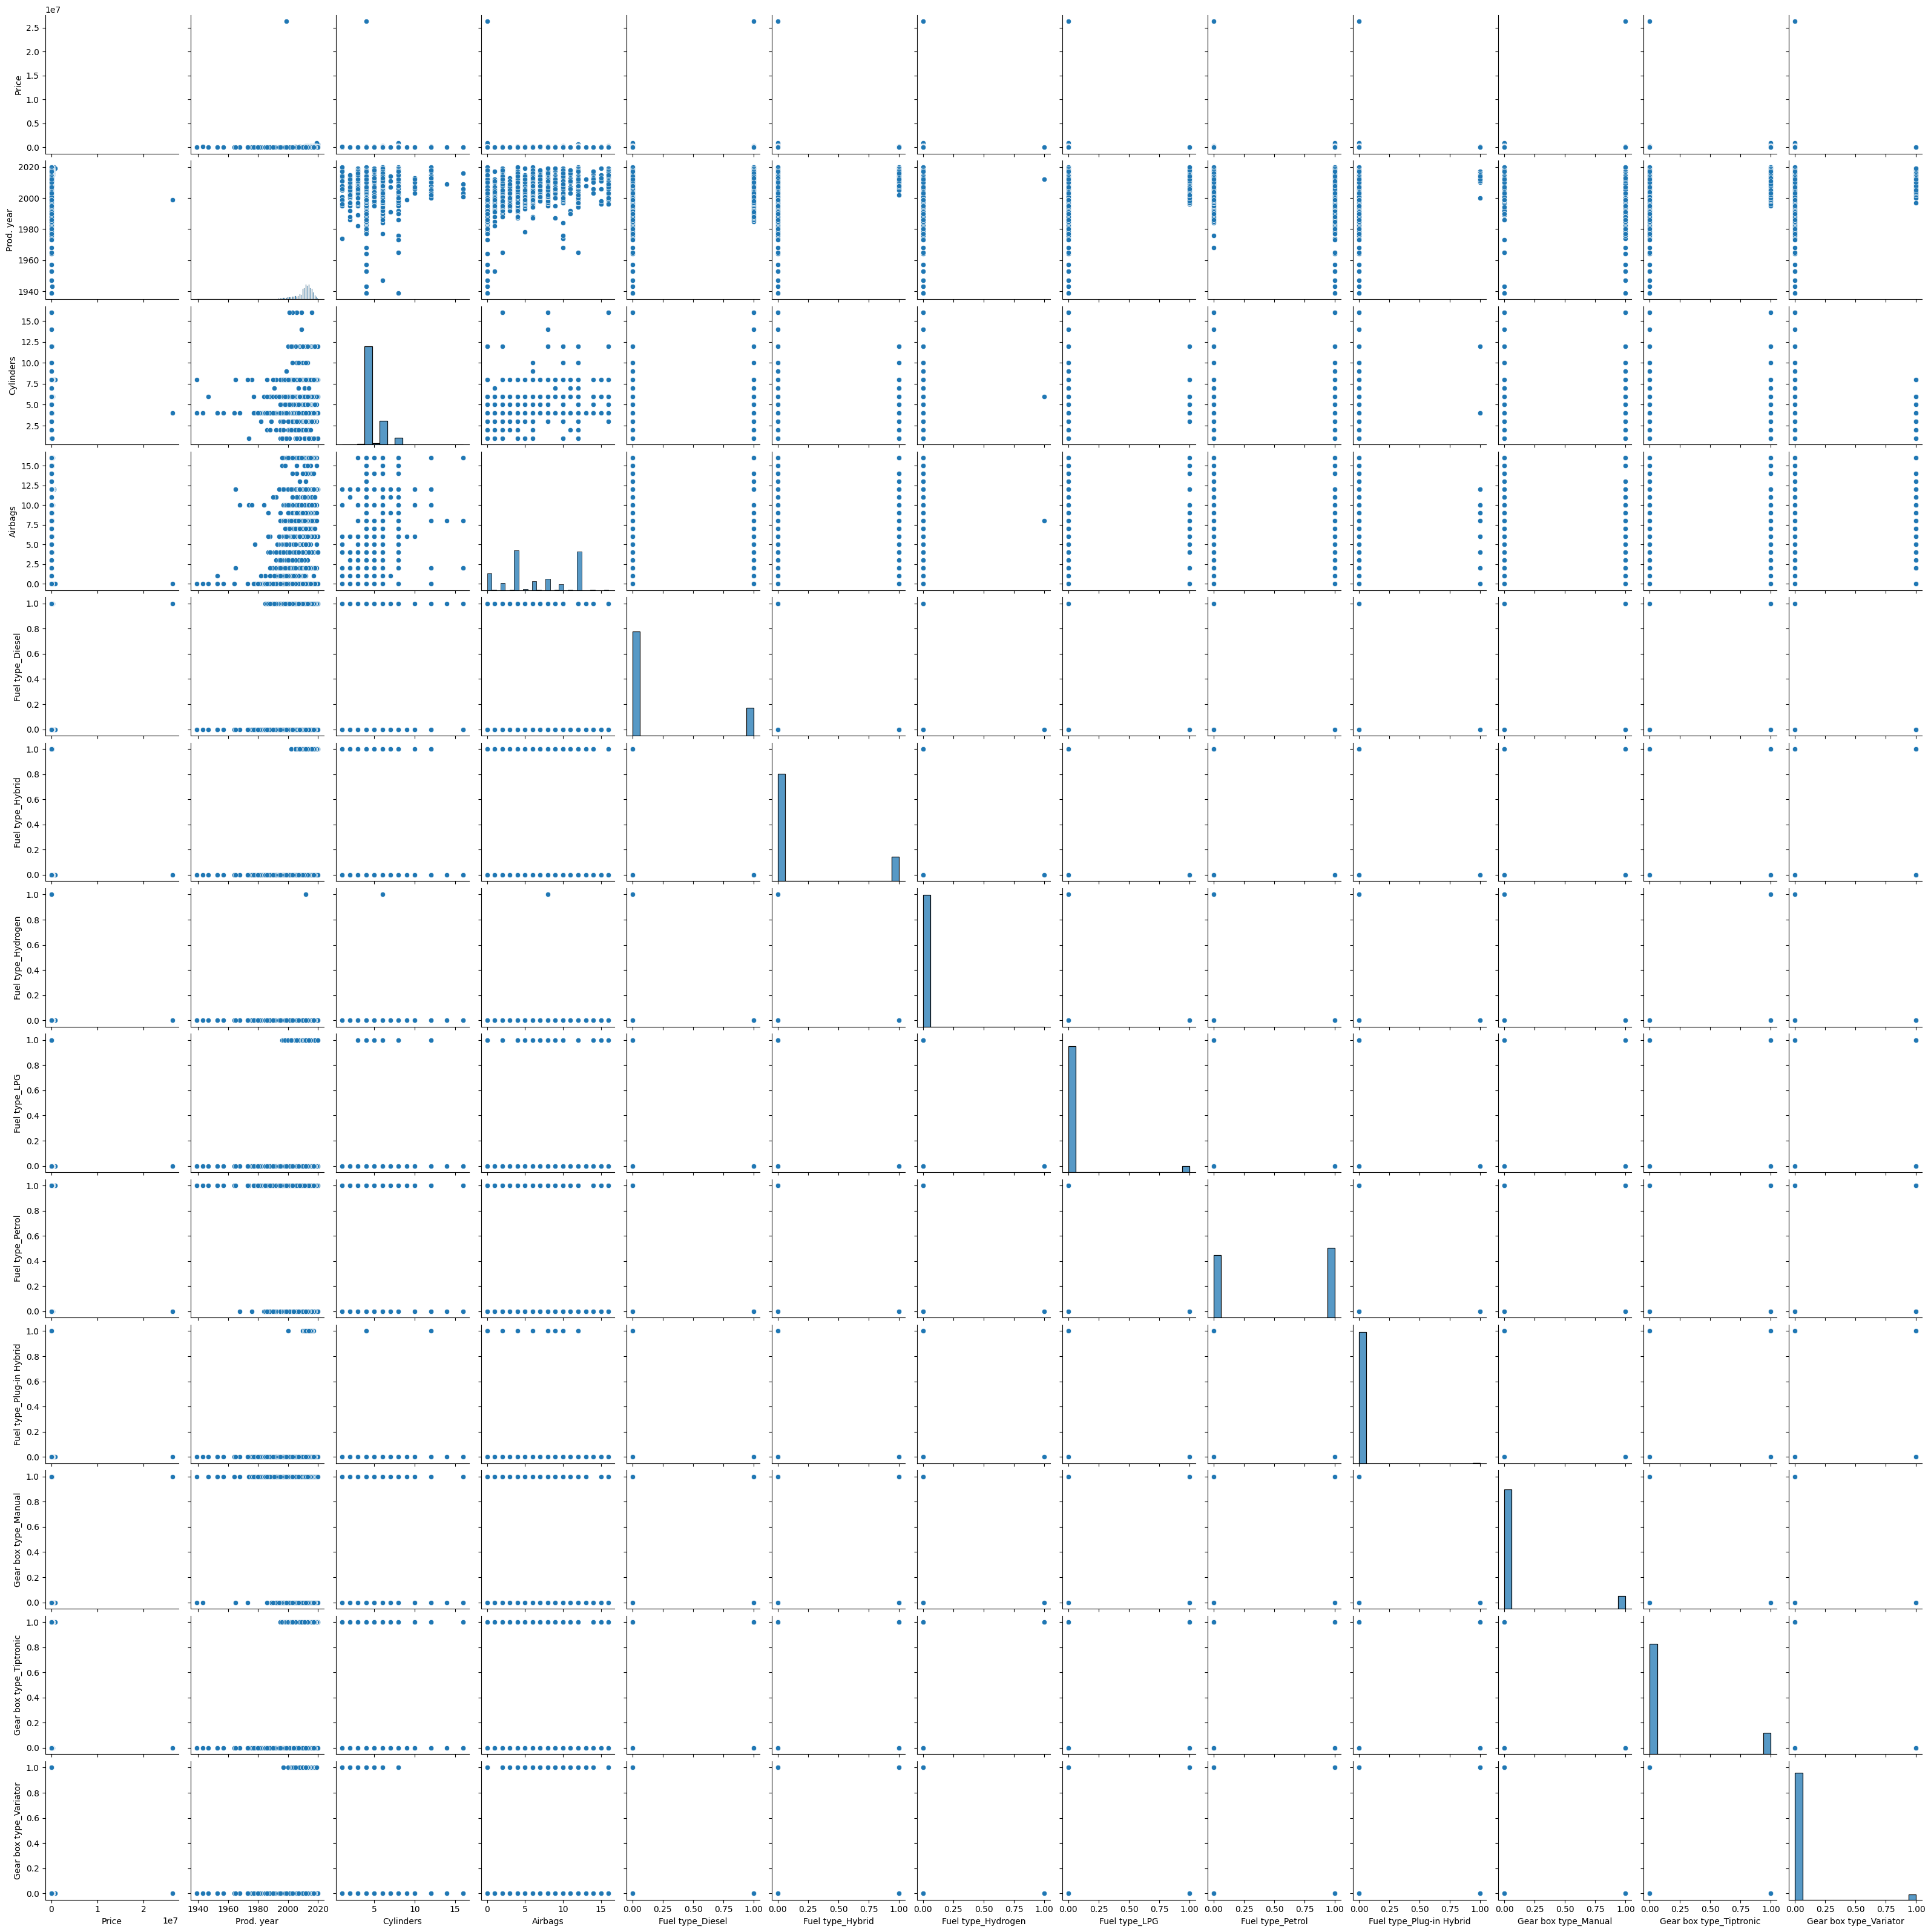

In [90]:
sns.pairplot(pe)

<Axes: xlabel='Fuel type', ylabel='Count'>

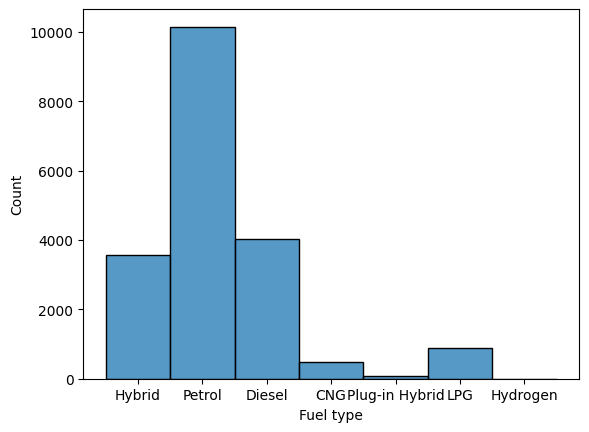

In [89]:
sns.histplot(pf['Fuel type'])

<Axes: xlabel='Gear box type', ylabel='count'>

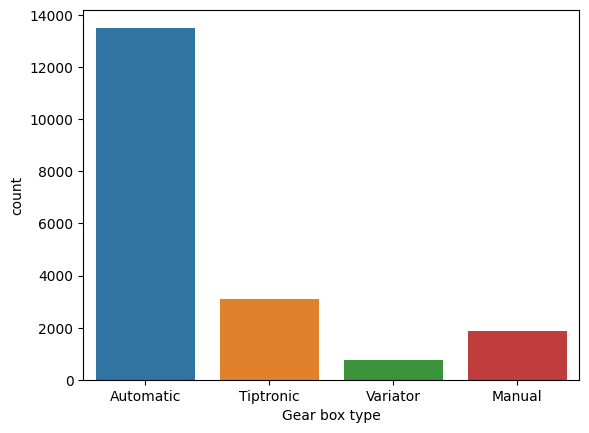

In [91]:
sns.countplot(x='Gear box type',data=pf)

<Axes: xlabel='Airbags', ylabel='Price'>

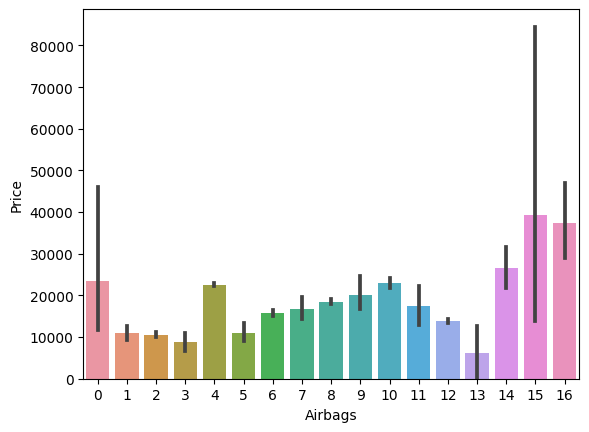

In [92]:
sns.barplot(x='Airbags',y='Price',data=pf)

<Axes: xlabel='Cylinders', ylabel='Airbags'>

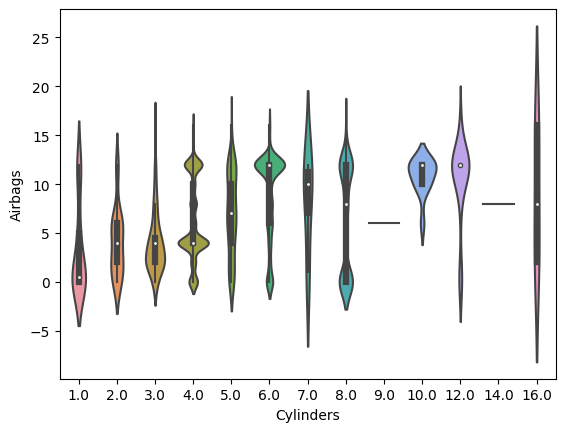

In [93]:
sns.violinplot(x='Cylinders',y='Airbags',data=pf)

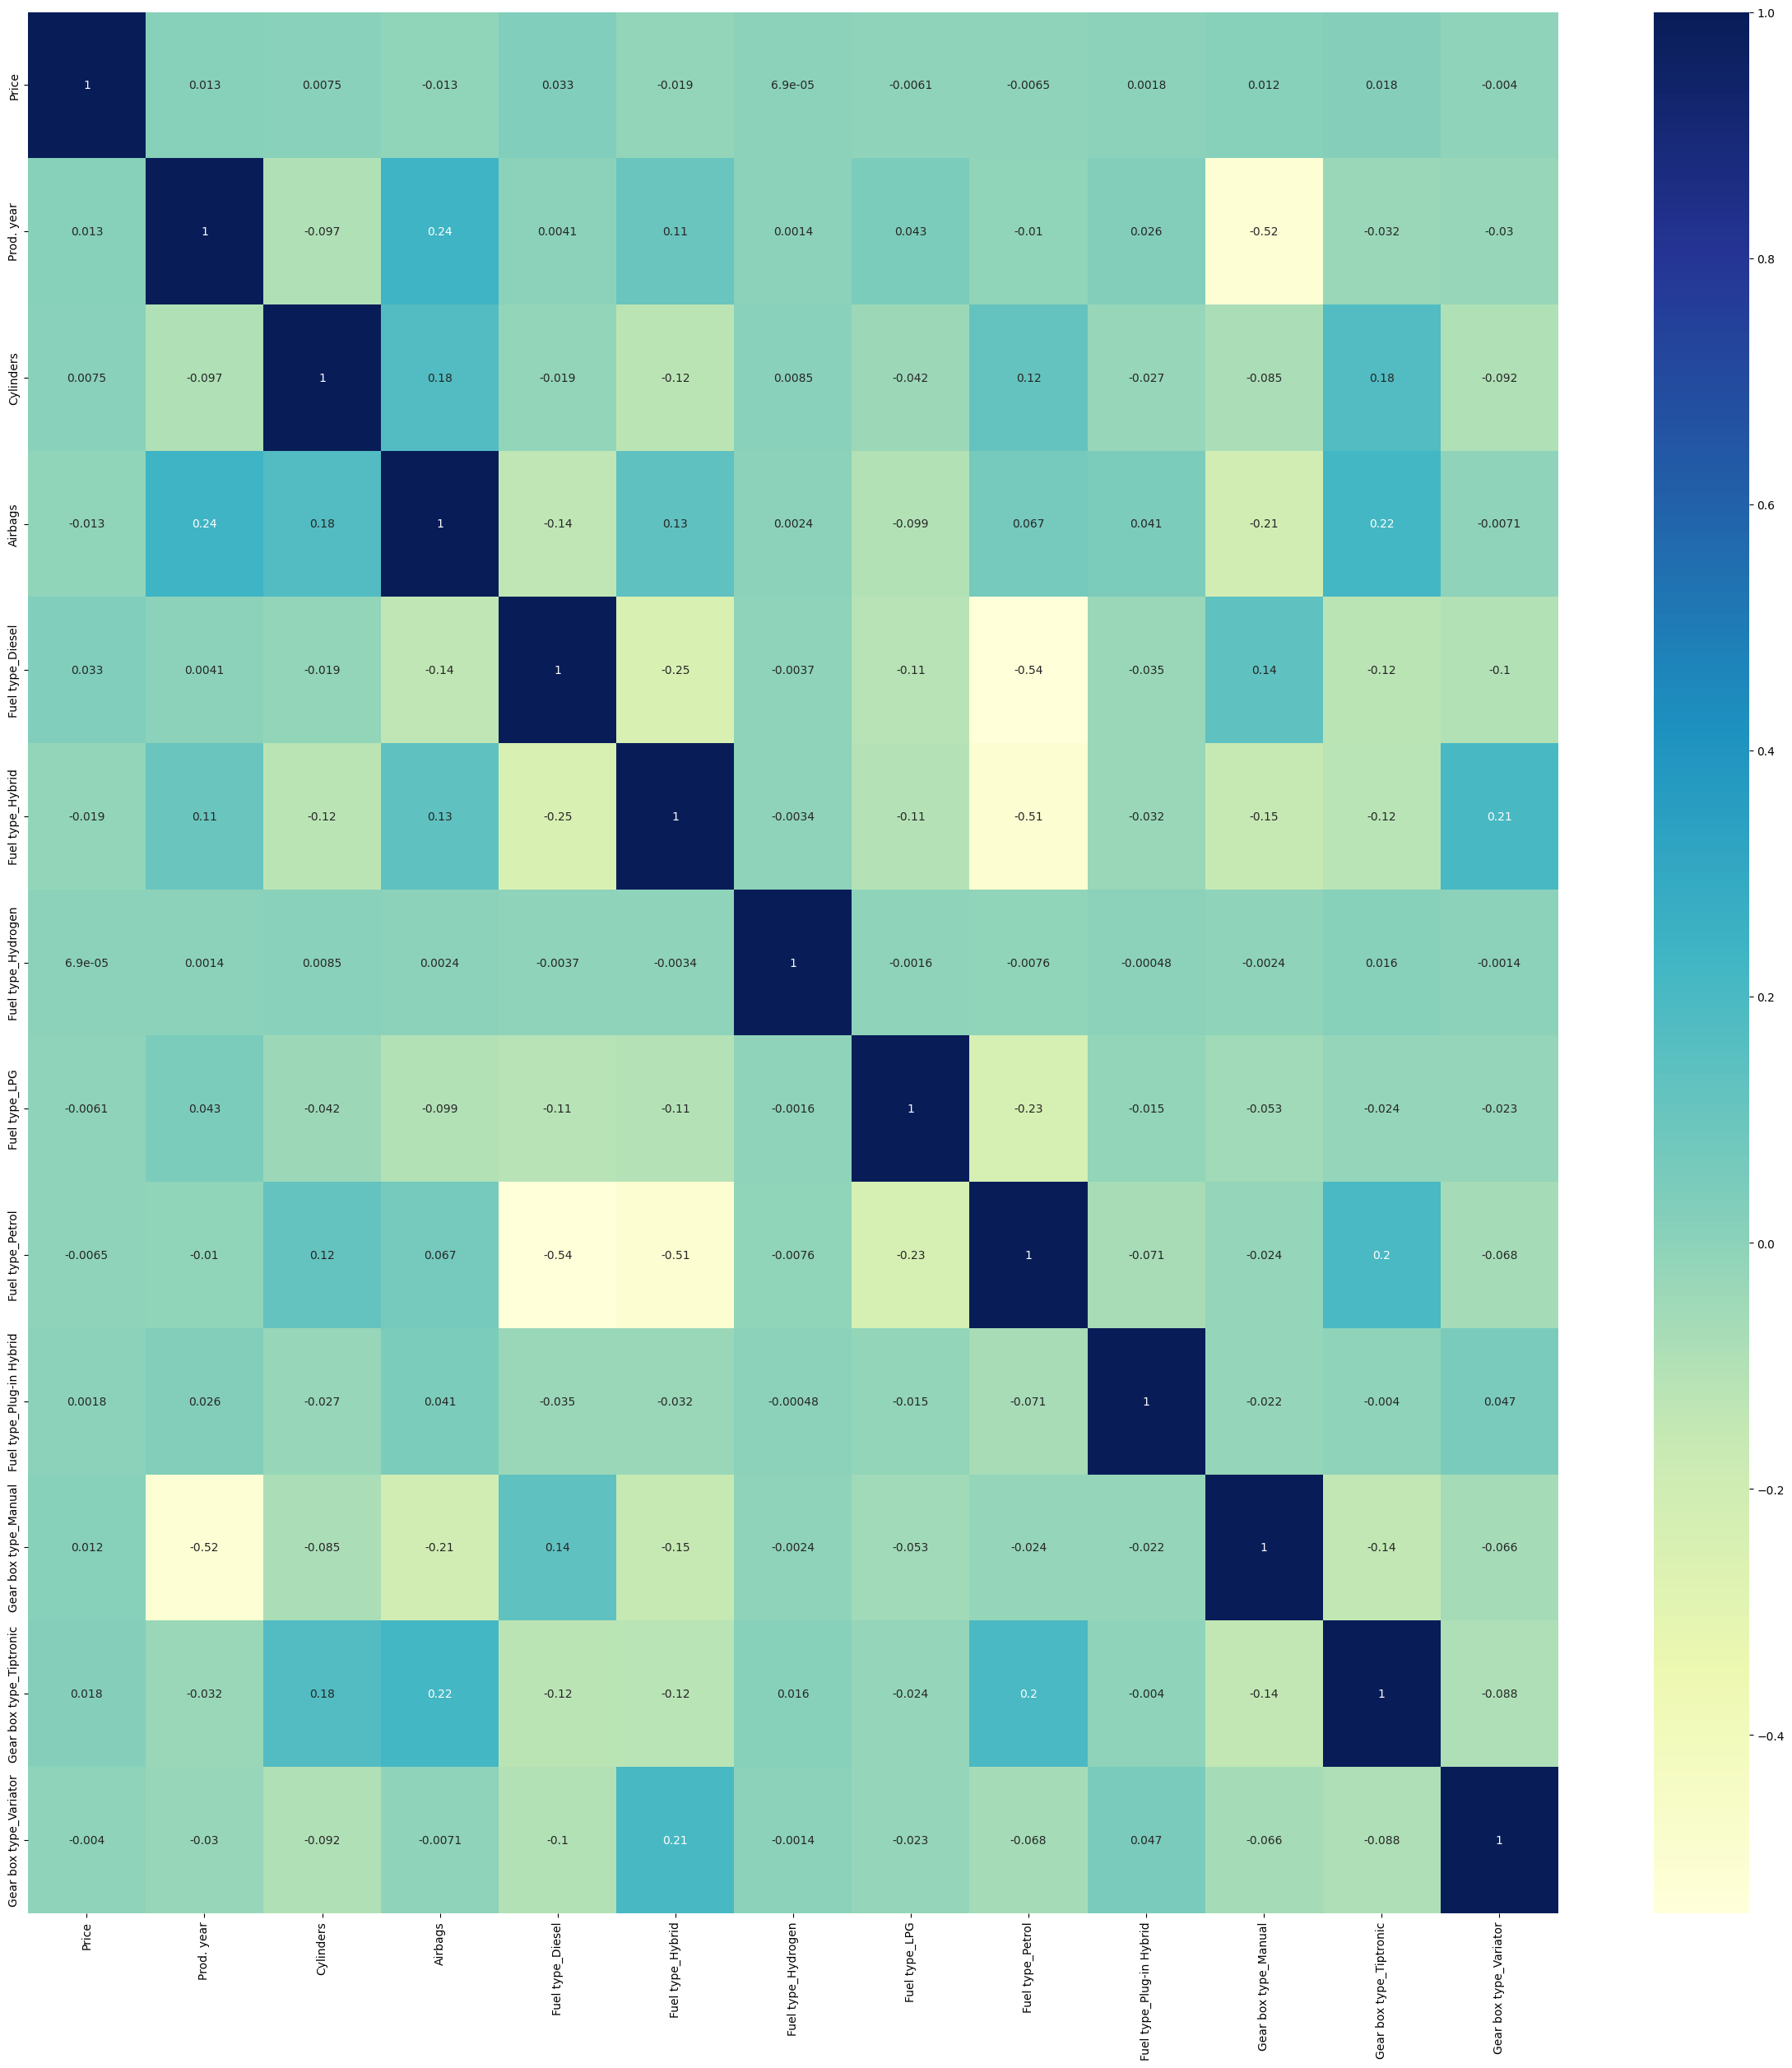

In [94]:
corrmat = pe.corr()
top_corelation_features = corrmat.index
plt.figure(figsize=(30,30))

g = sns.heatmap(pe[top_corelation_features].corr(),annot=True,cmap='YlGnBu')

In [95]:
pe.head()

,Price,Prod. year,Cylinders,Airbags,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator
0,13328,2010,6.0,12,0,1,0,0,0,0,0,0,0
1,16621,2011,6.0,8,0,0,0,0,1,0,0,1,0
2,8467,2006,4.0,2,0,0,0,0,1,0,0,0,1
3,3607,2011,4.0,0,0,1,0,0,0,0,0,0,0
4,11726,2014,4.0,4,0,0,0,0,1,0,0,0,0


In [99]:
x = pe.iloc[:,1:]
y = pe.iloc[:,0]

In [100]:
x.columns

Index(['Prod. year', 'Cylinders', 'Airbags', 'Fuel type_Diesel',
       'Fuel type_Hybrid', 'Fuel type_Hydrogen', 'Fuel type_LPG',
       'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator'],
      dtype='object')

In [103]:
y.head()

0    13328
1    16621
2     8467
3     3607
4    11726
Name: Price, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)


In [112]:
x_train.shape, x_test.shape

((11542, 12), (7695, 12))

In [113]:
from sklearn.linear_model import LinearRegression


In [125]:
model = LinearRegression()

In [126]:
model.fit(x_train,y_train)

LinearRegression()

In [128]:
predictions = model.predict(x_test)

In [129]:
predictions

array([ 8548.50380105, 21636.36557475, 22472.00281574, ...,
        3681.99916116, 14528.49791124, 24608.54417729])

In [130]:
from sklearn.metrics import mean_squared_error
MSE_Train = mean_squared_error(y_test,predictions)


In [143]:
MSE_Train

299313481.7892258